# Q
1. Masalah Interpolasi?

In [1]:
from time import time
from spectral.io import envi
from spectral import spypylab
from spectral import SpyFile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Read Data / Acquire Data

## a. Using Text

In [3]:
class_bayam = 'hijau'

In [4]:
white_path = 'data/'+class_bayam+'/white'
dark_path  = 'data/'+class_bayam+'/dark'
data_path  = 'data/'+class_bayam+'/data'

In [5]:
white = SpyFile.load(envi.open(white_path+'.hdr', white_path+'.raw'))
dark  = SpyFile.load(envi.open(dark_path+'.hdr',  dark_path+'.raw'))
data  = SpyFile.load(envi.open(data_path+'.hdr',  data_path+'.raw'))

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


In [6]:
info_white = envi.read_envi_header(white_path+'.hdr')
info_dark  = envi.read_envi_header(dark_path+'.hdr')
info_data  = envi.read_envi_header(data_path+'.hdr')

Header parameter names converted to lower case.
Header parameter names converted to lower case.
Header parameter names converted to lower case.


ImageView object:
  Display bands       :  [110, 51, 30]
  Interpolation       :  <default>
  RGB data limits     :
    R: [2034.0, 2761.0]
    G: [1050.0, 1409.0]
    B: [659.0, 834.0]

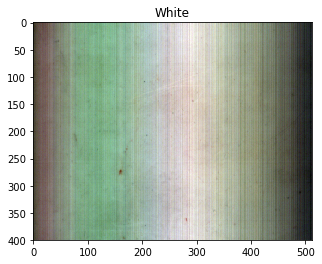

In [7]:
spypylab.imshow(white, title='White')

In [8]:
# info_white

ImageView object:
  Display bands       :  [110, 51, 0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [296.0, 343.0]
    G: [302.0, 343.0]
    B: [297.0, 346.0]

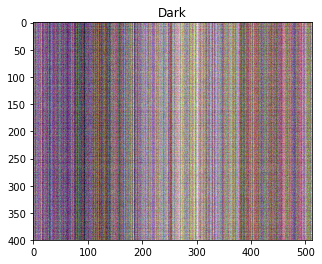

In [9]:
spypylab.imshow(dark, title='Dark')

ImageView object:
  Display bands       :  [110, 51, 30]
  Interpolation       :  <default>
  RGB data limits     :
    R: [517.0, 2769.0]
    G: [512.0, 1419.0]
    B: [380.0, 836.0]

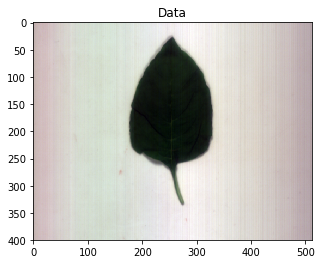

In [10]:
spypylab.imshow(data, title='Data')

## b. Using Dialog (User Interface)

In [11]:
from tkinter.filedialog import askopenfilenames

In [12]:
filename = askopenfilenames()

# 2. Image Correction

In [13]:
refl = (data-dark)/(white-dark)

In [14]:
refl.min()

0.065412566

In [15]:
refl.max()

1.5625

In [16]:
type(refl)

numpy.ndarray

ImageView object:
  Display bands       :  ['110', '51', '30']
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.084488153457641602, 1.0362390279769897]
    G: [0.18687872588634491, 1.0554435253143311]
    B: [0.1287553608417511, 1.0592783689498901]

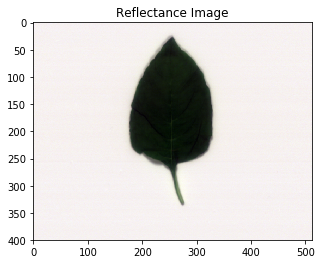

In [17]:
spypylab.imshow(refl, bands=['110', '51', '30'], title='Reflectance Image')

In [18]:
info_data['default bands']

['110', '51', '30']

In [19]:
r = refl[:,:,110]
g = refl[:,:,51]
b = refl[:,:,30]

In [20]:
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

In [21]:
r = scale_range(r,0,1)
g = scale_range(g,0,1)
b = scale_range(b,0,1)

In [22]:
rgb = np.stack([r, g, b], axis=2)

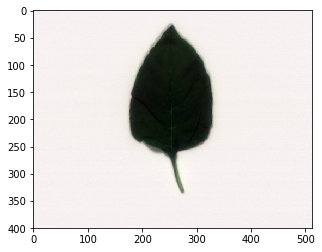

In [23]:
plt.imshow(rgb)

# 3. Image Segmentation

## a. ROI Selection

## b. Background Removal

In [24]:
% Standard Format for MAT File
% 1. single hypercube MAT (original name folder + .mat)
%    a. cropReflectance | Cell (Jumlah Crop x 1) | Size Y x Size X x Size Lamda
%    b. annotation | Struct with 10 Field | 
%       kelas1; 
%       kelas2; 
%       attribute1; valAtribut1;
%       attribute2; valAtribut2;
%       attribute3; valAtribut3;
%       attribute4; valAtribut4;
%    c. info
% 2. hypercube set MAT
%    - kelas1          | String Cell | Jumlah Data x 1
%    - kelas2          | String Cell | Jumlah Data x 1
%    - atribut_1_val   | Double      | Jumlah Data x 1 
%    - atribut_2_val   | Double      | Jumlah Data x 1
%    - atribut_3_val   | Double      | Jumlah Data x 1
%    - atribut_4_val   | Double      | Jumlah Data x 1
%    - atribut_1_str   | String Cell | Jumlah Data x 1
%    - atribut_2_str   | String Cell | Jumlah Data x 1
%    - atribut_3_str   | String Cell | Jumlah Data x 1
%    - atribut_4_str   | String Cell | Jumlah Data x 1
%    - featureSet      | Feature     | Jumlah Data x Jumlah Feature

UsageError: Line magic function `%Standard` not found.


# 4. Feature Extraction

## a. Spatial Feature Extraction

#### Averaging

#### GLCM

In [25]:
from skimage.feature import greycomatrix, greycoprops

## b. Spectral Feature Extraction 

# c. Combine Spatial & Spectral Feature

# ~ Load Data ~

In [26]:
data = pd.read_csv('bayam.csv')

In [27]:
data.head()

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,418.62,421.24,...,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81,KELAS,Klorofil,Karotenoid
0,0.839319,0.820332,0.785513,0.746262,0.693169,0.638736,0.581102,0.537281,0.490982,0.441364,...,0.923589,0.924362,0.924366,0.926125,0.926814,0.927459,0.928605,Bayam Hijau,0.002924,0.000807
1,0.821606,0.797796,0.764226,0.717804,0.669445,0.615049,0.560441,0.517036,0.469772,0.429566,...,0.933070,0.934551,0.934840,0.934903,0.936326,0.936553,0.937044,Bayam Hijau,0.002957,0.001075
2,0.828003,0.813982,0.778822,0.740456,0.685374,0.628786,0.573093,0.529259,0.486284,0.436080,...,0.919257,0.920286,0.921046,0.921217,0.922272,0.923261,0.923304,Bayam Hijau,0.003303,0.001100
3,0.808019,0.792098,0.758907,0.711431,0.668219,0.611063,0.560877,0.511063,0.472035,0.427021,...,0.929298,0.931407,0.931593,0.931614,0.933515,0.934420,0.933606,Bayam Hijau,0.003093,0.001022
4,0.848514,0.825828,0.790666,0.744157,0.693831,0.636402,0.577946,0.533336,0.485979,0.441871,...,0.925939,0.927293,0.927272,0.928785,0.930458,0.931784,0.932393,Bayam Hijau,0.002721,0.000886


In [28]:
data.describe()

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,418.62,421.24,...,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81,Klorofil,Karotenoid
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,...,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,0.798775,0.773348,0.735355,0.687816,0.634977,0.581035,0.529259,0.482612,0.440303,0.400547,...,0.924852,0.925939,0.927137,0.928308,0.929444,0.930736,0.931961,0.932686,0.002676,0.136146
std,0.024380,0.026762,0.028763,0.030543,0.030629,0.030336,0.027718,0.024854,0.024607,0.020868,...,0.019600,0.019718,0.019837,0.019973,0.020105,0.020331,0.020297,0.020075,0.000653,0.048245
min,0.736530,0.702952,0.663204,0.608951,0.552982,0.507990,0.461740,0.420908,0.383817,0.348574,...,0.852561,0.854086,0.854689,0.856337,0.857961,0.859392,0.859989,0.859949,0.001352,0.000782
25%,0.780735,0.753471,0.713481,0.665767,0.612686,0.558701,0.508735,0.464866,0.421819,0.385328,...,0.913921,0.914647,0.915235,0.915956,0.917479,0.918526,0.919636,0.920423,0.002250,0.116469
50%,0.799260,0.772032,0.733745,0.685061,0.631510,0.575648,0.525923,0.478425,0.436673,0.397962,...,0.925394,0.926211,0.927478,0.928762,0.929595,0.930525,0.931751,0.932428,0.002583,0.137666
75%,0.813284,0.792021,0.754525,0.710325,0.658516,0.604399,0.549790,0.500249,0.457799,0.414397,...,0.937670,0.939147,0.940019,0.941497,0.942334,0.943125,0.944435,0.945271,0.002987,0.165160
max,0.865911,0.850539,0.815664,0.767940,0.710808,0.655332,0.600505,0.547255,0.504301,0.457215,...,0.973227,0.974930,0.974670,0.976515,0.978317,0.978276,0.979866,0.980750,0.004989,0.243709


# ~ Train Test Split ~

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
def configTraining(path, kelas, target):
    data = pd.read_csv(path)
    if kelas == 1:
        data = data.loc[data.KELAS =='Bayam Hijau']
    elif kelas == 2:
        data = data.loc[data.KELAS =='Bayam Merah']
    else:
        data = pd.read_csv(path)
        
    y = data[target]
    x = data.drop(['Unnamed: 0','KELAS','Klorofil','Karotenoid'], axis = 1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)
    
    return x_train, x_test, y_train, y_test
        


In [31]:
x_train, x_test, y_train, y_test = configTraining('data_bayam.csv', 0, 'Klorofil')

In [32]:
x_train.head()

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,418.62,421.24,...,978.46,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81
100,0.791143,0.766676,0.734486,0.688715,0.640579,0.594057,0.540654,0.488306,0.447810,0.407799,...,0.953990,0.952884,0.954886,0.957283,0.958236,0.959532,0.961902,0.962694,0.964035,0.964064
10,0.830991,0.820611,0.777883,0.734342,0.686571,0.634809,0.579362,0.532669,0.490493,0.440321,...,0.920143,0.921103,0.921475,0.922349,0.923267,0.924489,0.924577,0.926451,0.927422,0.927621
149,0.769262,0.741241,0.708902,0.675428,0.622491,0.570318,0.524222,0.471521,0.432403,0.393859,...,0.942666,0.943352,0.944252,0.946552,0.948269,0.950335,0.952469,0.955725,0.957567,0.960389
171,0.770862,0.754408,0.718503,0.672209,0.621227,0.570740,0.521915,0.473400,0.434310,0.395349,...,0.920196,0.920996,0.921654,0.923203,0.924107,0.926229,0.926757,0.928043,0.928387,0.929771
178,0.810140,0.794985,0.762380,0.706849,0.654108,0.605129,0.548718,0.495455,0.457124,0.413740,...,0.917924,0.918062,0.918733,0.920005,0.921584,0.922360,0.923019,0.924490,0.925041,0.926190


In [33]:
x_train.shape

(147, 224)

In [34]:
x_train.describe()

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,418.62,421.24,...,978.46,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.798389,0.772919,0.734754,0.687141,0.634377,0.580487,0.528846,0.482330,0.440029,0.400389,...,0.922391,0.922955,0.923763,0.924854,0.926030,0.927183,0.928268,0.929575,0.930820,0.931566
std,0.024098,0.026965,0.028950,0.030928,0.030826,0.030695,0.028092,0.025275,0.025079,0.021199,...,0.019034,0.019242,0.019466,0.019577,0.019684,0.019816,0.019922,0.020134,0.020113,0.019885
min,0.736530,0.702952,0.663204,0.608951,0.552982,0.507990,0.461740,0.420908,0.383817,0.348574,...,0.850391,0.851454,0.852561,0.854086,0.854689,0.856337,0.857961,0.859392,0.859989,0.859949
25%,0.780505,0.752205,0.711731,0.663570,0.610210,0.556184,0.507519,0.463982,0.420863,0.384852,...,0.910910,0.910761,0.911837,0.912462,0.913759,0.914818,0.916274,0.917176,0.918051,0.919103
50%,0.797457,0.772014,0.733673,0.683020,0.630640,0.573886,0.524558,0.478012,0.435051,0.397693,...,0.922357,0.922968,0.923514,0.924286,0.925191,0.926229,0.927513,0.928630,0.930310,0.931292
75%,0.814397,0.791412,0.753951,0.707987,0.657918,0.604461,0.549335,0.499755,0.458671,0.414408,...,0.934011,0.934712,0.935752,0.936721,0.937269,0.938969,0.940272,0.941734,0.943320,0.943822
max,0.865911,0.850539,0.815664,0.767940,0.710808,0.655332,0.600505,0.547255,0.504301,0.457215,...,0.969751,0.971080,0.973227,0.974930,0.974670,0.976515,0.978317,0.978276,0.979866,0.980750


# ~ Spectral Analysis ~

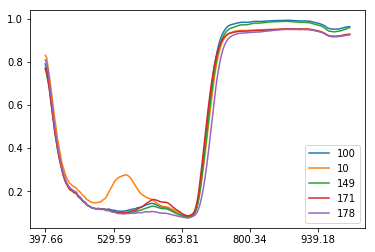

In [51]:
x_train.head().transpose().plot()

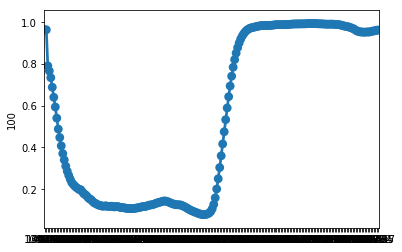

In [49]:
sns.pointplot(x=x_transpose.index, y = x_transpose[100])

In [38]:
x_transpose = x_train.transpose()

In [39]:
x_transpose.head()

,100,10,149,171,178,176,107,104,8,77,...,96,57,123,106,83,17,98,66,126,109
397.66,0.791143,0.830991,0.769262,0.770862,0.810140,0.774535,0.824387,0.832361,0.836178,0.790738,...,0.781129,0.777267,0.824500,0.839791,0.822658,0.774623,0.812287,0.808220,0.848983,0.799145
400.28,0.766676,0.820611,0.741241,0.754408,0.794985,0.757669,0.794872,0.805275,0.816645,0.765334,...,0.757866,0.750621,0.800332,0.823782,0.790809,0.737109,0.798150,0.768768,0.832068,0.765246
402.9,0.734486,0.777883,0.708902,0.718503,0.762380,0.729961,0.764979,0.772586,0.778624,0.716639,...,0.713198,0.711262,0.769255,0.790726,0.744167,0.698780,0.760291,0.723672,0.796882,0.733448
405.52,0.688715,0.734342,0.675428,0.672209,0.706849,0.684850,0.719031,0.729501,0.741262,0.665526,...,0.662667,0.655556,0.718742,0.742013,0.689120,0.653444,0.720369,0.671271,0.756118,0.683020
408.13,0.640579,0.686571,0.622491,0.621227,0.654108,0.631838,0.667570,0.669372,0.688008,0.605106,...,0.609895,0.603632,0.669459,0.689273,0.631550,0.599531,0.669454,0.622642,0.698574,0.634095


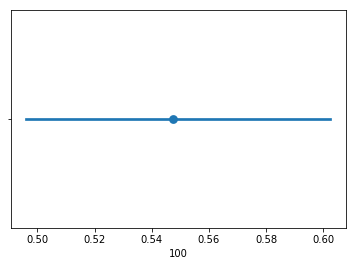

In [40]:
sns.pointplot(x_transpose[100])

In [44]:
data_plot = data.iloc[0]

# 5. Feature Selection

## a. Spatial Feature Selection

In [ ]:
# 

## b. Spectral Feature Selection

#### PCA

In [56]:
# import package PCA :
# from sklearn.decomposition import PCA
from sklearn.decomposition import PCA

In [57]:
# define PCA with random_state=123
principal_comp = PCA(random_state=123)

In [58]:
# fit to data_train_clean
principal_comp.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)

In [59]:
# component of PCA
component = pd.DataFrame(principal_comp.components_)
component.columns = x_train.columns
component

,397.66,400.28,402.9,405.52,408.13,410.75,413.37,416,418.62,421.24,...,978.46,981.27,984.09,986.9,989.72,992.54,995.35,998.17,1000.99,1003.81
0,-0.012589,-0.020628,-0.029906,-0.035919,-0.036735,-0.038351,-0.034300,-0.027970,-0.029804,-0.022592,...,-0.022192,-0.022783,-0.023220,-0.023678,-0.024091,-0.024367,-0.024741,-0.025347,-0.025242,-0.024554
1,-0.019783,-0.029647,-0.029332,-0.034736,-0.033461,-0.033075,-0.031538,-0.027113,-0.026957,-0.025102,...,-0.081196,-0.081783,-0.082579,-0.082578,-0.082482,-0.082931,-0.083053,-0.083311,-0.083358,-0.082799
2,0.077469,0.083662,0.083770,0.087962,0.085646,0.082249,0.074343,0.074185,0.067889,0.060614,...,0.024830,0.024974,0.025036,0.024348,0.024884,0.024453,0.024098,0.024836,0.024437,0.024082
3,0.172645,0.198722,0.212446,0.219013,0.218031,0.215863,0.201950,0.186730,0.183618,0.161411,...,-0.009140,-0.007535,-0.008207,-0.008936,-0.008226,-0.008060,-0.008331,-0.007695,-0.008501,-0.010450
4,-0.113175,-0.139162,-0.147579,-0.162363,-0.167656,-0.157057,-0.138361,-0.128935,-0.119759,-0.095608,...,0.032751,0.034665,0.035593,0.035944,0.039021,0.040706,0.041601,0.042144,0.043090,0.044503
5,-0.199532,-0.162438,-0.100791,-0.047296,-0.011733,0.014302,0.004424,0.015948,0.022856,-0.007303,...,-0.017666,-0.013969,-0.015659,-0.015239,-0.014926,-0.016884,-0.016401,-0.016958,-0.018122,-0.020951
6,0.186042,0.176813,0.175551,0.140065,0.122129,0.112065,0.078310,0.050986,0.053150,0.023677,...,0.020428,0.025706,0.034808,0.040744,0.048612,0.052835,0.056584,0.064101,0.068638,0.065994
7,-0.064704,-0.036959,0.009121,0.010910,0.026686,0.020891,0.014110,0.009799,0.033727,0.005342,...,-0.150681,-0.146330,-0.143182,-0.145332,-0.140918,-0.139829,-0.136286,-0.130034,-0.125160,-0.124064
8,-0.008885,0.036717,0.031095,0.032682,0.033404,0.020048,0.023908,0.018536,0.014794,0.005862,...,0.085206,0.075713,0.070573,0.070440,0.065189,0.051747,0.050952,0.038747,0.024842,0.018995
9,-0.199543,-0.057035,-0.056894,-0.044384,-0.015160,0.025998,0.059627,0.076673,0.096017,0.089293,...,0.042593,0.039208,0.039685,0.030049,0.024987,0.014664,0.002934,0.002000,-0.012726,-0.021360


In [60]:
# transform data_train_clean to data_pca
data_pca = pd.DataFrame(principal_comp.transform(x_train))

In [61]:
# check top observation
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,-0.433696,-0.261026,-0.060657,-0.048137,-0.007847,0.022977,-0.006462,-0.011041,0.011610,-0.010275,...,0.000007,0.000060,0.000004,-0.000036,0.000057,-4.160235e-05,0.000004,0.000001,-0.000006,6.222914e-16
1,0.182359,0.047743,0.343043,0.118301,-0.050835,0.048220,-0.004019,-0.006948,-0.006398,0.009946,...,0.000016,0.000066,0.000040,0.000047,0.000011,5.113457e-05,-0.000050,-0.000006,-0.000052,6.134653e-16
2,-0.496548,-0.120481,-0.048264,-0.097887,0.039061,0.022302,-0.010392,-0.005573,-0.019077,-0.004817,...,0.000102,-0.000030,0.000046,-0.000073,-0.000013,-1.379686e-05,-0.000018,0.000025,0.000025,6.224608e-16
3,-0.304725,0.035418,-0.282713,0.037279,0.002532,0.060084,-0.018398,-0.013687,0.001086,0.010010,...,0.000006,-0.000012,-0.000032,0.000038,0.000072,-2.860375e-05,0.000049,-0.000035,-0.000048,6.157421e-16
4,-0.610411,0.390129,0.248005,-0.017698,0.069426,0.013042,0.056119,0.002699,0.037243,0.026583,...,-0.000080,-0.000018,0.000049,0.000029,-0.000008,-2.975574e-08,-0.000034,-0.000022,-0.000022,6.297453e-16


In [62]:
# rename columns
data_pca.columns = range(1,data_pca.shape[1]+1)
data_pca = data_pca.add_prefix("PC_")
data_pca.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_138,PC_139,PC_140,PC_141,PC_142,PC_143,PC_144,PC_145,PC_146,PC_147
0,-0.433696,-0.261026,-0.060657,-0.048137,-0.007847,0.022977,-0.006462,-0.011041,0.011610,-0.010275,...,0.000007,0.000060,0.000004,-0.000036,0.000057,-4.160235e-05,0.000004,0.000001,-0.000006,6.222914e-16
1,0.182359,0.047743,0.343043,0.118301,-0.050835,0.048220,-0.004019,-0.006948,-0.006398,0.009946,...,0.000016,0.000066,0.000040,0.000047,0.000011,5.113457e-05,-0.000050,-0.000006,-0.000052,6.134653e-16
2,-0.496548,-0.120481,-0.048264,-0.097887,0.039061,0.022302,-0.010392,-0.005573,-0.019077,-0.004817,...,0.000102,-0.000030,0.000046,-0.000073,-0.000013,-1.379686e-05,-0.000018,0.000025,0.000025,6.224608e-16
3,-0.304725,0.035418,-0.282713,0.037279,0.002532,0.060084,-0.018398,-0.013687,0.001086,0.010010,...,0.000006,-0.000012,-0.000032,0.000038,0.000072,-2.860375e-05,0.000049,-0.000035,-0.000048,6.157421e-16
4,-0.610411,0.390129,0.248005,-0.017698,0.069426,0.013042,0.056119,0.002699,0.037243,0.026583,...,-0.000080,-0.000018,0.000049,0.000029,-0.000008,-2.975574e-08,-0.000034,-0.000022,-0.000022,6.297453e-16


In [63]:
# using all components will explain all variance
sum(principal_comp.explained_variance_ratio_)

1.0000000000000004

In [64]:
len(principal_comp.explained_variance_ratio_)

147

In [65]:
# variance explained by n_components :
for i in range(1, len(principal_comp.explained_variance_ratio_)+1):
    print (i, sum(principal_comp.explained_variance_ratio_[0:i]))

1 0.748718238631
2 0.878038467249
3 0.944848366016
4 0.976159537435
5 0.986392087007
6 0.994055758816
7 0.995835465607
8 0.99742647176
9 0.998299790146
10 0.998812345847
11 0.999131256971
12 0.999360129501
13 0.999495449224
14 0.999563812667
15 0.999622587638
16 0.999671282029
17 0.999715349449
18 0.999755840773
19 0.999784911801
20 0.99981226671
21 0.999835444836
22 0.999854105107
23 0.999869744032
24 0.999884454253
25 0.999896311308
26 0.999905341835
27 0.999914058895
28 0.99992179561
29 0.9999291534
30 0.999934333907
31 0.999938932124
32 0.999943214662
33 0.999947169178
34 0.999950589569
35 0.999953972371
36 0.999957051168
37 0.999960001923
38 0.999962741311
39 0.999965049345
40 0.999967095191
41 0.999968912229
42 0.999970602192
43 0.999972208969
44 0.999973596075
45 0.999974870825
46 0.999976069073
47 0.999977216002
48 0.999978314562
49 0.999979351109
50 0.99998030668
51 0.999981205853
52 0.999982045726
53 0.99998285137
54 0.999983611792
55 0.999984319866
56 0.999985019566
57 0.999

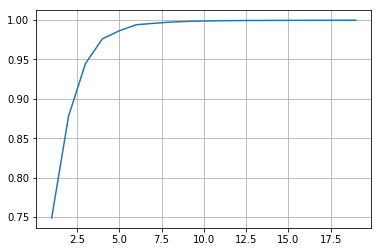

In [72]:
# Evaluate score for K in range 2-10
score = pd.Series([])
range_comp = range(1, 20)#len(principal_comp.explained_variance_ratio_)+1)
for i in range_comp:
    score[i] =  sum(principal_comp.explained_variance_ratio_[0:i])
# Score visualization
plt.plot(range_comp, score)
plt.grid()

### KPCA

In [73]:
from sklearn.decomposition import KernelPCA

In [81]:
def transformKPCA(n_components,kernel,data_train, data_test):
    kpca = KernelPCA(n_components,kernel)
    kpca.fit(data_train)
    kpca_train = pd.DataFrame(kpca.transform(data_train))
    kpca_train.index = data_train.index
    kpca_train.columns = range(1, kpca_train.shape[1]+1)
    kpca_train =  kpca_train.add_prefix("KPC_")

    kpca_test = pd.DataFrame(kpca.transform(data_test))
    kpca_test.index = data_test.index
    kpca_test.columns = range(1, kpca_test.shape[1]+1)
    kpca_test =  kpca_test.add_prefix("KPC_")
    
    return kpca_train, kpca_test, kpca

In [82]:
x_train, x_test, y_train, y_test = configTraining('data_bayam.csv', 0, 'Klorofil')

In [83]:
x_train_k, x_test_k , kpca= transformKPCA(200,'linear',x_train, x_test)

In [84]:
kpca.explain

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=200, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)

In [85]:
# Evaluate score for K in range 2-10
score = pd.Series([])
range_comp = range(1, 20)#len(principal_comp.explained_variance_ratio_)+1)
for i in range_comp:
    score[i] =  sum(kpca.explained_variance_ratio_[0:i])
# Score visualization
plt.plot(range_comp, score)
plt.grid()

AttributeError: 'KernelPCA' object has no attribute 'explained_variance_ratio_'

### IPCA

In [86]:
from sklearn.decomposition import IncrementalPCA

In [88]:
def transformIPCA(n_components,data_train, data_test):
    trf = IncrementalPCA(n_components)
    trf.fit(data_train)
    trf_train = pd.DataFrame(trf.transform(data_train))
    trf_train.index = data_train.index
    trf_train.columns = range(1, trf_train.shape[1]+1)
    trf_train =  trf_train.add_prefix("IPC_")

    trf_test = pd.DataFrame(trf.transform(data_test))
    trf_test.index = data_test.index
    trf_test.columns = range(1, trf_test.shape[1]+1)
    trf_test =  trf_test.add_prefix("IPC_")
    
    return trf_train, trf_test, trf

In [93]:
x_train, x_test, y_train, y_test = configTraining('data_bayam.csv', 0, 'Klorofil')

In [94]:
x_train_i, x_test_i, ipca = transformIPCA(12,x_train, x_test)

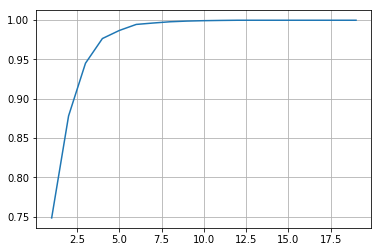

In [95]:
# Evaluate score for K in range 2-10
score = pd.Series([])
range_comp = range(1, 20)#len(principal_comp.explained_variance_ratio_)+1)
for i in range_comp:
    score[i] =  sum(ipca.explained_variance_ratio_[0:i])
# Score visualization
plt.plot(range_comp, score)
plt.grid()

### Non-negative Matrix Factorization

In [91]:
from sklearn.decomposition import NMF

In [96]:
def transformNMF(n_components,data_train, data_test):
    nmf = NMF(n_components)
    nmf.fit(data_train)
    nmf_train = pd.DataFrame(nmf.transform(data_train))
    nmf_train.index = data_train.index
    nmf_train.columns = range(1, nmf_train.shape[1]+1)
    nmf_train =  nmf_train.add_prefix("NMF_")

    nmf_test = pd.DataFrame(nmf.transform(data_test))
    nmf_test.index = data_test.index
    nmf_test.columns = range(1, nmf_test.shape[1]+1)
    nmf_test =  nmf_test.add_prefix("NMF_")
    
    return nmf_train, nmf_test, nmf

In [97]:
x_train, x_test, y_train, y_test = configTraining('data_bayam.csv', 0, 'Klorofil')

In [98]:
x_train_n, x_test_n, nmf= transformNMF(8,x_train, x_test)

#### Genetic Algorithm

In [ ]:
from gplearn.genetic import SymbolicTransformer
from sklearn.utils import check_random_state

In [ ]:
from gplearn.genetic import SymbolicRegressor



In [ ]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']

In [ ]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=200, stopping_criteria=0.01,
                           p_crossover=0.6, p_subtree_mutation=0.1,
                           function_set=function_set,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=456)

In [ ]:
est_gp.fit(x_train, y_train)

In [ ]:
print(est_gp._program)

In [ ]:
est_gp.score(x_train, y_train)

In [ ]:
# x_train, x_test, y_train, y_test = configTraining('data_bayam.csv', , 'Klorofil')

In [ ]:
function_set = ['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                'abs', 'neg', 'inv', 'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=20,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.7, verbose=1,
                         random_state=2123, n_jobs=-1)
gp.fit(x_train, y_train)

In [ ]:
gp_features = gp.transform(x_train)
new_train = np.hstack((x_train, gp_features))
gp_features = gp.transform(x_test)
new_test = np.hstack((x_test, gp_features))

fitRegress(LinearRegression(), new_train, y_train, new_test, y_test)
fitRegress(Ridge(), new_train, y_train, new_test, y_test)
fitRegress(HuberRegressor(), new_train, y_train, new_test, y_test)


In [ ]:
gp_train = gp.transform(x_train)
gp_test = gp.transform(x_test)

fitRegress(LinearRegression(), gp_train, y_train, gp_test, y_test)
fitRegress(Ridge(), gp_train, y_train, gp_test, y_test)
fitRegress(HuberRegressor(), gp_train, y_train, gp_test, y_test)


In [ ]:
# fitRegress(HuberRegressor(epsilon=1.23, alpha=0.000000001), x_train_gp, y_train,x_test_gp, y_test)

In [ ]:
x_train_gp, x_test_gp = SNV(gp.transform(x_train),gp.transform(x_test))

In [ ]:
fitRegress(LinearRegression(), x_train_gp, y_train,x_test_gp, y_test)
fitRegress(Ridge(), x_train_gp, y_train,x_test_gp, y_test)
fitRegress(HuberRegressor(), x_train_gp, y_train,x_test_gp, y_test)

# ~ Spectral Pre-treatment ~

   ### SNV / Z-score / Standard Scaler

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
def transformSTD(standard, x):
    x_std = pd.DataFrame(standard.transform(x))
    #x_std.columns = x.columns
    #x_std.index = x.index
    return x_std

In [104]:
def SNV(x_train, x_test):
    standard = StandardScaler()
    standard.fit(x_train, y_train)
    x_train = transformSTD(standard, x_train)
    x_test = transformSTD(standard, x_test)
    return x_train, x_test, standard

In [105]:
x_train_snv, x_test_snv, snv = SNV(x_train, x_test)

### 1st Derivative

In [106]:
def derivative1(data):
    for idx in range(0, data.shape[0]):
        temp_array = data[idx]
        if idx == 0:
            temp_pd = pd.DataFrame(np.gradient(temp_array,edge_order=1)).transpose()
        else:
            temp = pd.DataFrame(np.gradient(temp_array,edge_order=1)).transpose()
            temp_pd = pd.concat([temp, temp_pd], axis=0, ignore_index=True)
   # temp_pd.columns = data.columns
   # temp_pd.index = data.index
    return temp_pd

In [107]:
x_train, x_test, y_train, y_test = configTraining('data_bayam.csv', 0, 'Klorofil')

In [ ]:
x_train = derivative1(x_train)
x_test  = derivative1(x_test)

### 2nd Derivative

In [ ]:
def derivative2(data):
    for idx in range(0, data.shape[0]):
        temp_array = data.iloc[idx]
        if idx == 0:
            temp_pd = pd.DataFrame(np.gradient(temp_array,edge_order=2)).transpose()
        else:
            temp = pd.DataFrame(np.gradient(temp_array,edge_order=2)).transpose()
            temp_pd = pd.concat([temp, temp_pd], axis=0, ignore_index=True)
    temp_pd.columns = data.columns
    temp_pd.index = data.index
    return temp_pd

In [ ]:
x_train, x_test, y_train, y_test = configTraining('data_bayam.csv', 0, 'Klorofil')

In [ ]:
x_train2 = derivative2(x_train)
x_test2  = derivative2(x_test)

In [ ]:
x_train = pd.concat([x_train, x_train2],axis=1)
x_test = pd.concat([x_test, x_test2],axis=1)

# 6. Modelling/Transfer Function

## a. Regression

In [108]:
def fitRegress(regressor, x_train, y_train, x_test, y_test):
    std = y_train.describe()['std']
    t0 = time()
    regressor.fit(x_train, y_train)
    print(regressor)
    print ("Training Time : ",time() - t0,"s")
    print("---"*10)
    print("R2 on Train : ", regressor.score(x_train, y_train))
    print("RMSE Train  : ", np.sqrt(mean_squared_error(y_train, regressor.predict(x_train))))
    print("RPD Train   : ", std/np.sqrt(mean_squared_error(y_train, regressor.predict(x_train))))
    print("---"*10)
    std = y_test.describe()['std']
    print("R2 on Test : ", regressor.score(x_test, y_test))
    print("RMSE Test  : ", np.sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
    print("RPD Test   : ", std/np.sqrt(mean_squared_error(y_test, regressor.predict(x_test))))
    print("="*30)
    print()
    
    min_val = y_train.describe()['min']
    max_val = y_train.describe()['max']
    std_val = y_train.describe()['std']
    lower_limit = min_val-std_val
    upper_limit = max_val+std_val
    t = np.arange(lower_limit, upper_limit, 0.00001)
    plt.figure(1)
    plt.scatter(y_train, regressor.predict(x_train))
    plt.xlim([lower_limit,upper_limit])
    plt.ylim([lower_limit, upper_limit])
    plt.plot(t, t, 'r--')
    plt.title('Train')

    min_val = y_test.describe()['min']
    max_val = y_test.describe()['max']
    std_val = y_test.describe()['std']
    lower_limit = min_val-std_val
    upper_limit = max_val+std_val
    t = np.arange(lower_limit, upper_limit, 0.00001)
    plt.figure(2)
    plt.scatter(y_test, regressor.predict(x_test))
    plt.xlim([lower_limit,upper_limit])
    plt.ylim([lower_limit, upper_limit])
    plt.plot(t, t, 'r--')
    plt.title('Test')
    
    return regressor

In [109]:
def benchRegress(regressor, x_train, y_train, x_test, y_test):
    std = y_train.describe()['std']
    regressor.fit(x_train, y_train)
    r2_train   =  regressor.score(x_train, y_train)
    rmse_train =  np.sqrt(mean_squared_error(y_train, regressor.predict(x_train)))
    rpd_train  =  std/np.sqrt(mean_squared_error(y_train, regressor.predict(x_train)))
    std        = y_test.describe()['std']
    r2_test    = regressor.score(x_test, y_test)
    rmse_test  = np.sqrt(mean_squared_error(y_test, regressor.predict(x_test)))
    rpd_test   = std/np.sqrt(mean_squared_error(y_test, regressor.predict(x_test))) 
   
    
    return rmse_train, r2_train, rpd_train, rmse_test, r2_test, rpd_test

In [110]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#### PLSR

In [111]:
def getBenchmarkPLSR(n_com, x_train, x_test, y_train, y_test):
    n_co = []
    rmse_train = []
    r2_train = []
    rpd_train = []
    rmse_test = []
    r2_test = []
    rpd_test = []
    for comp in range(1,n_com+1):
        n_co.append(comp)
        regressor = PLSRegression(n_components=comp)
        a, b, c, d, e, f = benchRegress(regressor, x_train, y_train, x_test, y_test)
        rmse_train.append(a)
        r2_train.append(b)
        rpd_train.append(c)
        rmse_test.append(d)
        r2_test.append(e)
        rpd_test.append(f)
    plt.figure(1)
    train, = plt.plot(n_co, rmse_train, label='Train')
    test, =  plt.plot(n_co, rmse_test, label='Test')
    plt.title("RMSE")
    plt.legend(handles=[train, test])
    
    plt.figure(2)
    plt.title("R2")
    train, = plt.plot(n_co, r2_train, label='Train')
    test, =  plt.plot(n_co, r2_test, label='Test')
    plt.legend(handles=[train, test])

    plt.figure(3)
    plt.title('RPD')
    train, = plt.plot(n_co, rpd_train, label='Train')
    test, =  plt.plot(n_co, rpd_test, label='Test')
    plt.legend(handles=[train, test])



In [112]:
x_train, x_test, y_train, y_test = configTraining('data_bayam.csv', 2, 'Karotenoid')

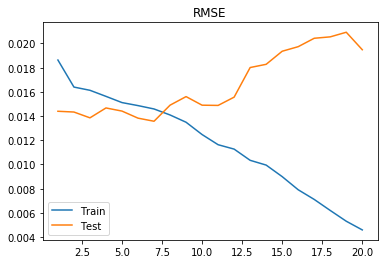

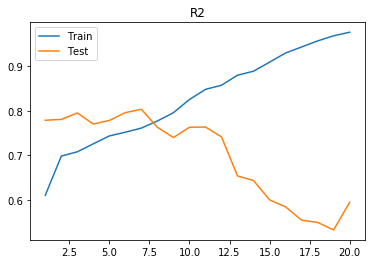

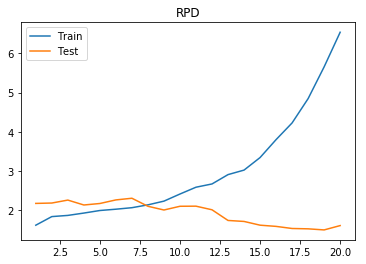

In [113]:
getBenchmarkPLSR(20, x_train, x_test, y_train, y_test)

In [ ]:
plsr = PLSRegression(n_components=7)

In [ ]:
plsr = fitRegress(plsr, x_train, y_train, x_test, y_test)

#### PCAR

In [114]:
from sklearn.decomposition import PCA

In [115]:
def transformPCA(comp,data_train, data_test):
    trf = PCA(comp)
    trf.fit(data_train)
    trf_train = pd.DataFrame(trf.transform(data_train))
    trf_train.index = data_train.index
    trf_train.columns = range(1, trf_train.shape[1]+1)
    trf_train =  trf_train.add_prefix("PC_")

    trf_test = pd.DataFrame(trf.transform(data_test))
    trf_test.index = data_test.index
    trf_test.columns = range(1, trf_test.shape[1]+1)
    trf_test =  trf_test.add_prefix("PC_")
    
    return trf, trf_train, trf_test

In [116]:
def getBenchmarkPCR(n_com, x_train, x_test, y_train, y_test):
    n_co = []
    rmse_train = []
    r2_train = []
    rpd_train = []
    rmse_test = []
    r2_test = []
    rpd_test = []
    for comp in range(1,n_com+1):
        n_co.append(comp)
        regressor = LinearRegression()
        pca, x_train_pca, x_test_pca = transformPCA(comp, x_train, x_test)
        a, b, c, d, e, f = benchRegress(regressor, x_train_pca, y_train, x_test_pca, y_test)
        rmse_train.append(a)
        r2_train.append(b)
        rpd_train.append(c)
        rmse_test.append(d)
        r2_test.append(e)
        rpd_test.append(f)
    plt.figure(1)
    train, = plt.plot(n_co, rmse_train, label='Train')
    test, =  plt.plot(n_co, rmse_test, label='Test')
    plt.title("RMSE")
    plt.legend(handles=[train, test])
    
    plt.figure(2)
    plt.title("R2")
    train, = plt.plot(n_co, r2_train, label='Train')
    test, =  plt.plot(n_co, r2_test, label='Test')
    plt.legend(handles=[train, test])

    plt.figure(3)
    plt.title('RPD')
    train, = plt.plot(n_co, rpd_train, label='Train')
    test, =  plt.plot(n_co, rpd_test, label='Test')
    plt.legend(handles=[train, test])
    
    plt.figure(4)
    plt.title('Variance Explained')
    pc = PCA(n_components=n_com)
    pc.fit(x_train)
    explained_var = []
    for i in range(1, len(pc.explained_variance_ratio_)+1):
        explained_var.append(sum(pc.explained_variance_ratio_[0:i]))  
    plt.plot(n_co, explained_var)

In [117]:
x_train, x_test, y_train, y_test = configTraining('data_bayam.csv', 0, 'Karotenoid')

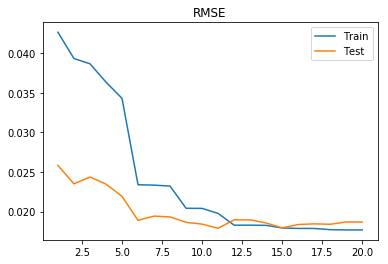

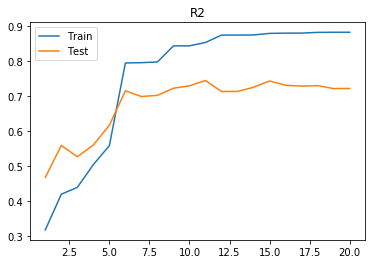

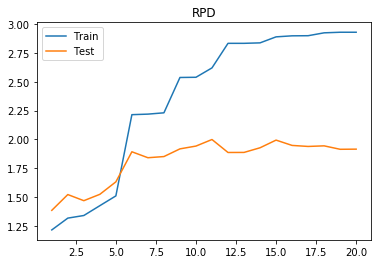

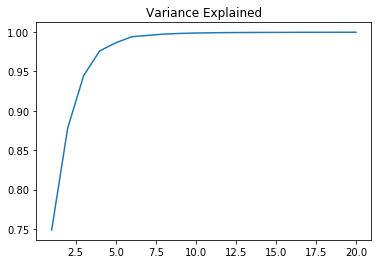

In [118]:
getBenchmarkPCR(20, x_train, x_test, y_train, y_test)

In [119]:
pc, x_train_pca, x_test_pca = transformPCA(18, x_train, x_test)

In [120]:
pcr = LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Training Time :  0.0025038719177246094 s
------------------------------
R2 on Train :  0.882393533768
RMSE Train  :  0.0177029974479
RPD Train   :  2.92594823942
------------------------------
R2 on Test :  0.729935635705
RMSE Test  :  0.0183881606316
RPD Test   :  1.94421272144



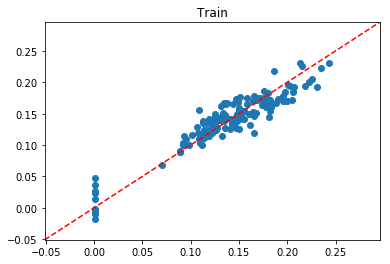

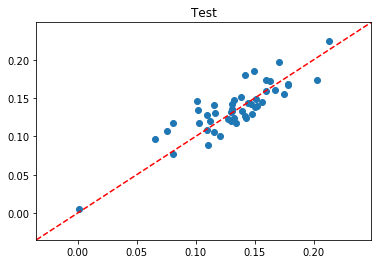

In [123]:
pcr = fitRegress(pcr, x_train_pca, y_train, x_test_pca, y_test)

#### ANN

In [ ]:
from keras

## b. Classification

#### LDA

In [124]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [125]:
lda = LinearDiscriminantAnalysis()

#### SVM

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def rbfSVC_fit(x_train, y_train):
    rbfSVC = SVC(kernel = 'rbf')

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001]}

    random_rbfSVC = RandomizedSearchCV(rbfSVC, param_distributions = hyperparam, cv = 5,
                                    n_iter = 5, n_jobs=2, random_state = 123)
    
    random_rbfSVC.fit(x_train, y_train)
    
    print ("Best Accuracy", random_rbfSVC.score(x_train, y_train))
    print ("Best Param", random_rbfSVC.best_params_)
    
    return random_rbfSVC 

In [ ]:
best_rbfSVC = rbfSVC_fit(x_train, y_train) 

In [ ]:
RBF_SVC = SVC(kernel = 'rbf', C=best_rbfSVC.best_params_.get('C'))
RBF_SVC.fit(x_train, y_train)

In [ ]:
def linearSVC_fit(x_train, y_train):
    linear_SVC = SVC(kernel = 'linear')

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001]}

    random_linear_SVC = RandomizedSearchCV(linear_SVC, param_distributions = hyperparam, cv = 5,
                                    n_iter = 5, n_jobs=2, random_state = 123)
    
    random_linear_SVC.fit(x_train, y_train)
    
    print ("Best Accuracy", random_linear_SVC.score(x_train, y_train))
    print ("Best Param", random_linear_SVC.best_params_)
    
    return random_linear_SVC 

In [ ]:
best_linear_SVC = linearSVC_fit(x_train, y_train) 

In [ ]:
Linear_SVC = SVC(kernel = 'linear', C=best_linear_SVC.best_params_.get('C'))
Linear_SVC.fit(x_train, y_train)

In [ ]:
def logreg_fit(x_train, y_train):
    logreg = LogisticRegression()

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001],
                 'penalty': ['l1', 'l2']}

    random_logreg = RandomizedSearchCV(logreg, param_distributions = hyperparam, cv = 5,
                                    n_iter = 15, n_jobs=2, random_state = 123)
    
    random_logreg.fit(x_train, y_train)
    
    print ("Best Accuracy", random_logreg.score(x_train, y_train))
    print ("Best Param", random_logreg.best_params_)
    
    return random_logreg

In [ ]:
best_logreg = logreg_fit(x_train, y_train) 

In [ ]:
logreg = LogisticRegression(C=best_logreg.best_params_.get('C'), 
                            penalty=best_logreg.best_params_.get('penalty'))
logreg.fit(x_train, y_train)

In [ ]:
# Import classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
# lakukan RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def decTree_fit(x_train, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)

    hyperparam = {'min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'max_features': ['sqrt', 'log2', 0.25, 0.5, 0.75]}

    random_decTree = RandomizedSearchCV(decTree, param_distributions = hyperparam, cv = 5,
                                        n_iter = 15, scoring = scoring, n_jobs=-1, random_state = 123)
    
    random_decTree.fit(x_train, y_train)
    
    print ("Best Accuracy", random_decTree.best_score_)
    print ("Best Param", random_decTree.best_params_)
    
    return random_decTree

In [ ]:
best_decTree = decTree_fit(x_train, y_train)

In [ ]:
decTree = DecisionTreeClassifier(min_samples_leaf = best_decTree.best_params_.get('min_samples_leaf'),
                                 max_features = best_decTree.best_params_.get('max_features'), random_state=123)
decTree.fit(x_train, y_train)

In [ ]:
def bagging_fit(x_train, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)
    
    bagging = BaggingClassifier(base_estimator = decTree, random_state=123)
    
    hyperparam = {'base_estimator__min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'n_estimators': [100, 200, 300, 500, 1000]}
    # 'base_estimator__' sebelum 'min_samples_leaf' menandakan hyperparameter yang dicari ada di dalam base estimatornya
    # dalam hal ini berarti decTree
    # (min_samples_leaf ada di dalam decTree)
    
    random_bagging = RandomizedSearchCV(bagging, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 10, scoring = scoring, n_jobs=-1, random_state = 123)
    random_bagging.fit(x_train, y_train)
    
    print ("Best Accuracy", random_bagging.best_score_)
    print ("Best Param", random_bagging.best_params_)
    return random_bagging

In [ ]:
best_bagging = bagging_fit(x_train, y_train)

In [ ]:
decTreeBag = DecisionTreeClassifier(min_samples_leaf = best_bagging.best_params_.get('base_estimator__min_samples_leaf'),
                                    random_state=123)
bagging = BaggingClassifier(base_estimator = decTreeBag, 
                            n_estimators = best_bagging.best_params_.get('n_estimators'),
                            random_state=123, n_jobs=-1)
bagging.fit(x_train, y_train)

In [ ]:
def randomForest_fit(x_train, y_train, scoring = 'accuracy'):
    randomForest = RandomForestClassifier(random_state=123)

    hyperparam = {'min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'max_features': ['sqrt', 'log2', 0.25, 0.5, 0.75], 
                  'n_estimators': [100, 200, 300, 500, 1000]}
    
    random_randomForest = RandomizedSearchCV(randomForest, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 10, scoring = scoring, n_jobs=-1, random_state = 123)
    random_randomForest.fit(x_train, y_train)
    
    print ("Best Accuracy", random_randomForest.best_score_)
    print ("Best Param", random_randomForest.best_params_)
    return random_randomForest

In [ ]:
best_randForest = randomForest_fit(x_train, y_train)

In [ ]:
randForest = RandomForestClassifier(random_state=123, n_jobs = -1,
                                   min_samples_leaf = best_randForest.best_params_.get('min_samples_leaf'),
                                   max_features = best_randForest.best_params_.get('max_features'),
                                   n_estimators = best_randForest.best_params_.get('n_estimators'))
randForest.fit(x_train, y_train)

In [ ]:
def adaBoost_fit(x_train, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)
    
    adaBoost = AdaBoostClassifier(base_estimator = decTree, random_state=123)
    
    hyperparam = {'base_estimator__min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'learning_rate':[1., .1, .01, .001],
                  'n_estimators': [100, 200, 300]}
    
    random_adaBoost = RandomizedSearchCV(adaBoost, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 1, scoring = scoring, n_jobs=-1, random_state = 123)
    random_adaBoost.fit(x_train, y_train)
    
    print ("Best Accuracy", random_adaBoost.best_score_)
    print ("Best Param", random_adaBoost.best_params_)
    return random_adaBoost

In [ ]:
best_adaBoost = adaBoost_fit(x_train, y_train)

In [ ]:
decTreeAdaBoost = DecisionTreeClassifier(min_samples_leaf = best_adaBoost.best_params_.get('base_estimator__min_samples_leaf'),
                                    random_state=123)
adaBoost = AdaBoostClassifier(base_estimator = decTreeAdaBoost, 
                            n_estimators = best_adaBoost.best_params_.get('n_estimators'),
                            learning_rate = best_adaBoost.best_params_.get('learning_rate'),
                            random_state=123)
adaBoost.fit(x_train, y_train)

In [ ]:
best_rbfSVC = rbfSVC_fit(x_train, y_train) 

In [ ]:
RBF_SVC = SVC(kernel = 'rbf', C=best_rbfSVC.best_params_.get('C'))
RBF_SVC.fit(x_train, y_train)

In [ ]:
def linearSVC_fit(x_train, y_train):
    linear_SVC = SVC(kernel = 'linear')

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001]}

    random_linear_SVC = RandomizedSearchCV(linear_SVC, param_distributions = hyperparam, cv = 5,
                                    n_iter = 5, n_jobs=2, random_state = 123)
    
    random_linear_SVC.fit(x_train, y_train)
    
    print ("Best Accuracy", random_linear_SVC.score(x_train, y_train))
    print ("Best Param", random_linear_SVC.best_params_)
    
    return random_linear_SVC 

In [ ]:
best_linear_SVC = linearSVC_fit(x_train, y_train) 

In [ ]:
Linear_SVC = SVC(kernel = 'linear', C=best_linear_SVC.best_params_.get('C'))
Linear_SVC.fit(x_train, y_train)

In [ ]:
def logreg_fit(x_train, y_train):
    logreg = LogisticRegression()

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001],
                 'penalty': ['l1', 'l2']}

    random_logreg = RandomizedSearchCV(logreg, param_distributions = hyperparam, cv = 5,
                                    n_iter = 15, n_jobs=2, random_state = 123)
    
    random_logreg.fit(x_train, y_train)
    
    print ("Best Accuracy", random_logreg.score(x_train, y_train))
    print ("Best Param", random_logreg.best_params_)
    
    return random_logreg

In [ ]:
best_logreg = logreg_fit(x_train, y_train) 

In [ ]:
logreg = LogisticRegression(C=best_logreg.best_params_.get('C'), 
                            penalty=best_logreg.best_params_.get('penalty'))
logreg.fit(x_train, y_train)

In [ ]:
# Import classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
# lakukan RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def decTree_fit(x_train, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)

    hyperparam = {'min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'max_features': ['sqrt', 'log2', 0.25, 0.5, 0.75]}

    random_decTree = RandomizedSearchCV(decTree, param_distributions = hyperparam, cv = 5,
                                        n_iter = 15, scoring = scoring, n_jobs=-1, random_state = 123)
    
    random_decTree.fit(x_train, y_train)
    
    print ("Best Accuracy", random_decTree.best_score_)
    print ("Best Param", random_decTree.best_params_)
    
    return random_decTree

In [ ]:
best_decTree = decTree_fit(x_train, y_train)

In [ ]:
decTree = DecisionTreeClassifier(min_samples_leaf = best_decTree.best_params_.get('min_samples_leaf'),
                                 max_features = best_decTree.best_params_.get('max_features'), random_state=123)
decTree.fit(x_train, y_train)

In [ ]:
def bagging_fit(x_train, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)
    
    bagging = BaggingClassifier(base_estimator = decTree, random_state=123)
    
    hyperparam = {'base_estimator__min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'n_estimators': [100, 200, 300, 500, 1000]}
    # 'base_estimator__' sebelum 'min_samples_leaf' menandakan hyperparameter yang dicari ada di dalam base estimatornya
    # dalam hal ini berarti decTree
    # (min_samples_leaf ada di dalam decTree)
    
    random_bagging = RandomizedSearchCV(bagging, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 10, scoring = scoring, n_jobs=-1, random_state = 123)
    random_bagging.fit(x_train, y_train)
    
    print ("Best Accuracy", random_bagging.best_score_)
    print ("Best Param", random_bagging.best_params_)
    return random_bagging

In [ ]:
best_bagging = bagging_fit(x_train, y_train)

In [ ]:
decTreeBag = DecisionTreeClassifier(min_samples_leaf = best_bagging.best_params_.get('base_estimator__min_samples_leaf'),
                                    random_state=123)
bagging = BaggingClassifier(base_estimator = decTreeBag, 
                            n_estimators = best_bagging.best_params_.get('n_estimators'),
                            random_state=123, n_jobs=-1)
bagging.fit(x_train, y_train)

In [ ]:
def randomForest_fit(x_train, y_train, scoring = 'accuracy'):
    randomForest = RandomForestClassifier(random_state=123)

    hyperparam = {'min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'max_features': ['sqrt', 'log2', 0.25, 0.5, 0.75], 
                  'n_estimators': [100, 200, 300, 500, 1000]}
    
    random_randomForest = RandomizedSearchCV(randomForest, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 10, scoring = scoring, n_jobs=-1, random_state = 123)
    random_randomForest.fit(x_train, y_train)
    
    print ("Best Accuracy", random_randomForest.best_score_)
    print ("Best Param", random_randomForest.best_params_)
    return random_randomForest

In [ ]:
best_randForest = randomForest_fit(x_train, y_train)

In [ ]:
randForest = RandomForestClassifier(random_state=123, n_jobs = -1,
                                   min_samples_leaf = best_randForest.best_params_.get('min_samples_leaf'),
                                   max_features = best_randForest.best_params_.get('max_features'),
                                   n_estimators = best_randForest.best_params_.get('n_estimators'))
randForest.fit(x_train, y_train)

In [ ]:
def adaBoost_fit(x_train, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)
    
    adaBoost = AdaBoostClassifier(base_estimator = decTree, random_state=123)
    
    hyperparam = {'base_estimator__min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'learning_rate':[1., .1, .01, .001],
                  'n_estimators': [100, 200, 300]}
    
    random_adaBoost = RandomizedSearchCV(adaBoost, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 1, scoring = scoring, n_jobs=-1, random_state = 123)
    random_adaBoost.fit(x_train, y_train)
    
    print ("Best Accuracy", random_adaBoost.best_score_)
    print ("Best Param", random_adaBoost.best_params_)
    return random_adaBoost

In [ ]:
best_adaBoost = adaBoost_fit(x_train, y_train)

In [ ]:
decTreeAdaBoost = DecisionTreeClassifier(min_samples_leaf = best_adaBoost.best_params_.get('base_estimator__min_samples_leaf'),
                                    random_state=123)
adaBoost = AdaBoostClassifier(base_estimator = decTreeAdaBoost, 
                            n_estimators = best_adaBoost.best_params_.get('n_estimators'),
                            learning_rate = best_adaBoost.best_params_.get('learning_rate'),
                            random_state=123)
adaBoost.fit(x_train, y_train)

In [ ]:
best_rbfSVC = rbfSVC_fit(x_train, y_train) 

In [ ]:
RBF_SVC = SVC(kernel = 'rbf', C=best_rbfSVC.best_params_.get('C'))
RBF_SVC.fit(x_train, y_train)

In [ ]:
def linearSVC_fit(x_train, y_train):
    linear_SVC = SVC(kernel = 'linear')

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001]}

    random_linear_SVC = RandomizedSearchCV(linear_SVC, param_distributions = hyperparam, cv = 5,
                                    n_iter = 5, n_jobs=2, random_state = 123)
    
    random_linear_SVC.fit(x_train, y_train)
    
    print ("Best Accuracy", random_linear_SVC.score(x_train, y_train))
    print ("Best Param", random_linear_SVC.best_params_)
    
    return random_linear_SVC 

In [ ]:
best_linear_SVC = linearSVC_fit(x_train, y_train) 

In [ ]:
Linear_SVC = SVC(kernel = 'linear', C=best_linear_SVC.best_params_.get('C'))
Linear_SVC.fit(x_train, y_train)

In [ ]:
def logreg_fit(x_train, y_train):
    logreg = LogisticRegression()

    hyperparam = {'C': [1000, 333.33, 100, 33.33, 10, 3.33, 10, 3.33, 1, 0.33, 0.1, 0.033, 0.01, 0.0033, 
                        0.001, 0.00033, 0.0001],
                 'penalty': ['l1', 'l2']}

    random_logreg = RandomizedSearchCV(logreg, param_distributions = hyperparam, cv = 5,
                                    n_iter = 15, n_jobs=2, random_state = 123)
    
    random_logreg.fit(x_train, y_train)
    
    print ("Best Accuracy", random_logreg.score(x_train, y_train))
    print ("Best Param", random_logreg.best_params_)
    
    return random_logreg

In [ ]:
best_logreg = logreg_fit(x_train, y_train) 

In [ ]:
logreg = LogisticRegression(C=best_logreg.best_params_.get('C'), 
                            penalty=best_logreg.best_params_.get('penalty'))
logreg.fit(x_train, y_train)

In [ ]:
# Import classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
# lakukan RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
def decTree_fit(x_train, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)

    hyperparam = {'min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'max_features': ['sqrt', 'log2', 0.25, 0.5, 0.75]}

    random_decTree = RandomizedSearchCV(decTree, param_distributions = hyperparam, cv = 5,
                                        n_iter = 15, scoring = scoring, n_jobs=-1, random_state = 123)
    
    random_decTree.fit(x_train, y_train)
    
    print ("Best Accuracy", random_decTree.best_score_)
    print ("Best Param", random_decTree.best_params_)
    
    return random_decTree

In [ ]:
best_decTree = decTree_fit(x_train, y_train)

In [ ]:
decTree = DecisionTreeClassifier(min_samples_leaf = best_decTree.best_params_.get('min_samples_leaf'),
                                 max_features = best_decTree.best_params_.get('max_features'), random_state=123)
decTree.fit(x_train, y_train)

In [ ]:
def bagging_fit(x_train, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)
    
    bagging = BaggingClassifier(base_estimator = decTree, random_state=123)
    
    hyperparam = {'base_estimator__min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'n_estimators': [100, 200, 300, 500, 1000]}
    # 'base_estimator__' sebelum 'min_samples_leaf' menandakan hyperparameter yang dicari ada di dalam base estimatornya
    # dalam hal ini berarti decTree
    # (min_samples_leaf ada di dalam decTree)
    
    random_bagging = RandomizedSearchCV(bagging, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 10, scoring = scoring, n_jobs=-1, random_state = 123)
    random_bagging.fit(x_train, y_train)
    
    print ("Best Accuracy", random_bagging.best_score_)
    print ("Best Param", random_bagging.best_params_)
    return random_bagging

In [ ]:
best_bagging = bagging_fit(x_train, y_train)

In [ ]:
decTreeBag = DecisionTreeClassifier(min_samples_leaf = best_bagging.best_params_.get('base_estimator__min_samples_leaf'),
                                    random_state=123)
bagging = BaggingClassifier(base_estimator = decTreeBag, 
                            n_estimators = best_bagging.best_params_.get('n_estimators'),
                            random_state=123, n_jobs=-1)
bagging.fit(x_train, y_train)

In [ ]:
def randomForest_fit(x_train, y_train, scoring = 'accuracy'):
    randomForest = RandomForestClassifier(random_state=123)

    hyperparam = {'min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'max_features': ['sqrt', 'log2', 0.25, 0.5, 0.75], 
                  'n_estimators': [100, 200, 300, 500, 1000]}
    
    random_randomForest = RandomizedSearchCV(randomForest, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 10, scoring = scoring, n_jobs=-1, random_state = 123)
    random_randomForest.fit(x_train, y_train)
    
    print ("Best Accuracy", random_randomForest.best_score_)
    print ("Best Param", random_randomForest.best_params_)
    return random_randomForest

In [ ]:
best_randForest = randomForest_fit(x_train, y_train)

In [ ]:
randForest = RandomForestClassifier(random_state=123, n_jobs = -1,
                                   min_samples_leaf = best_randForest.best_params_.get('min_samples_leaf'),
                                   max_features = best_randForest.best_params_.get('max_features'),
                                   n_estimators = best_randForest.best_params_.get('n_estimators'))
randForest.fit(x_train, y_train)

In [ ]:
def adaBoost_fit(x_train, y_train, scoring = 'accuracy'):
    decTree = DecisionTreeClassifier(random_state=123)
    
    adaBoost = AdaBoostClassifier(base_estimator = decTree, random_state=123)
    
    hyperparam = {'base_estimator__min_samples_leaf': [3, 5, 7, 9, 13, 17, 21, 27, 33, 41, 50, 60, 80, 100],
                  'learning_rate':[1., .1, .01, .001],
                  'n_estimators': [100, 200, 300]}
    
    random_adaBoost = RandomizedSearchCV(adaBoost, param_distributions = hyperparam, cv = 5, 
                                           n_iter = 1, scoring = scoring, n_jobs=-1, random_state = 123)
    random_adaBoost.fit(x_train, y_train)
    
    print ("Best Accuracy", random_adaBoost.best_score_)
    print ("Best Param", random_adaBoost.best_params_)
    return random_adaBoost

In [ ]:
best_adaBoost = adaBoost_fit(x_train, y_train)

In [ ]:
decTreeAdaBoost = DecisionTreeClassifier(min_samples_leaf = best_adaBoost.best_params_.get('base_estimator__min_samples_leaf'),
                                    random_state=123)
adaBoost = AdaBoostClassifier(base_estimator = decTreeAdaBoost, 
                            n_estimators = best_adaBoost.best_params_.get('n_estimators'),
                            learning_rate = best_adaBoost.best_params_.get('learning_rate'),
                            random_state=123)
adaBoost.fit(x_train, y_train)

## c. Visual Mapping

In [ ]:
% Urutan Pengujian Kinerja
% 1. Data Preparation
%    Input: Data Set (Jumlah Data x Image+Attribute+Info)
% 2. Cross Validation
%    Input: Folding Number (5 or 10)
% 3. Train system using proposed method to obtain model using Training Data
%    Input: Traning Data Set
%    Output: Model
% 4. Test system using Testing Data
%    Input: Model
%    Output: Prediction Attribute/Class
% 5. Compare Result with Reference Data
%    Input: Prediction & Reference/Target Attribute/Class
%    Output: Performance Value (Averaging)
%    - RMSE
%    - Confusion Matrix
%    - Accuracy


% Tools untuk Hyperspectral Analysis
%  1. Plot Reflectance/Transmitance Profile
%  2. Plot RGB Hypercube
%  3. Plot ROI
%  4. Plot Prediction vs Reference
%  5. Plot Prinsipal Component 1 v.s. 2
%  6. Plot Explained Variance
%  7. Plot Visual Mapping
%  8. Plot ROI on Original Image
%  9. Plot Background Removal Image
% 10. Plot Distribution Map
